In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import pickle

from termcolor import colored as cl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from math import radians, cos, sin, asin, sqrt


### Importation de données

In [65]:
dataset2 = pd.read_csv('mer positions.csv')
dataset = pd.read_excel('Data - Test technique PFE 8.xlsx')

### Fucnction to use 

In [66]:
#calculer la distance entre la cote mer la plus proche et chacune des maisons listées dans la DataSet
def dist(lat1, long1, lat2, long2):
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def find_nearest(lat, long):
    distances = dataset2.apply(lambda row: dist(lat, long, row['latitude'], row['longitude']), axis=1)
    return min(distances)

### Remplir la disctance mer

In [67]:
dataset['distance_mer'] = dataset.apply(lambda row: find_nearest(row['latitude'], row['longitude']), axis=1)

In [68]:
find_nearest(6.484708,43.506405)

5439.561818753514

In [71]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

id_mutation                  0
date_mutation                0
surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
distance_mer                 0
prix                         0
dtype: int64

In [72]:
dataset.corr()

,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
date_mutation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface_reelle_bati,NaN,1.000000,0.728987,0.066838,0.036951,-0.033274,0.438409
nombre_pieces_principales,NaN,0.728987,1.000000,0.087487,0.010994,-0.070995,0.334194
longitude,NaN,0.066838,0.087487,1.000000,-0.090681,-0.781243,0.163588
latitude,NaN,0.036951,0.010994,-0.090681,1.000000,0.652051,-0.323858
distance_mer,NaN,-0.033274,-0.070995,-0.781243,0.652051,1.000000,-0.306792
prix,NaN,0.438409,0.334194,0.163588,-0.323858,-0.306792,1.000000


In [73]:
#We eliminate nobre des piece principale or surface reele bati becouse theire is correlation between both of them
#dataset = dataset.drop(['longitude'], axis=1)
#dataset.head(2)

In [74]:
# Split our data
y = dataset.iloc[:,-1].values
X = dataset.iloc[:,2:7]
X.head(1)

,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer
0,153,4,6.484708,43.506405,23.349566


In [46]:
# Standardization
#from sklearn.preprocessing import StandardScaler
#ss1=StandardScaler() 
#X = pd.DataFrame(ss1.fit_transform(X),columns=X.columns)
#X.head(2)

,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer
0,1.725458,0.158615,-0.602792,0.856993,1.070239
1,-0.012454,0.158615,0.825911,0.444713,-0.503725


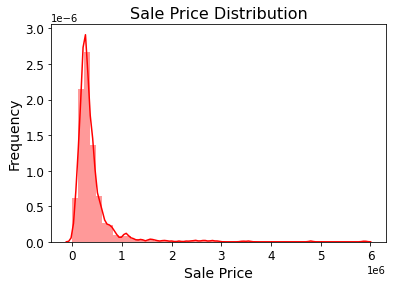

In [75]:
#Distribution plot
sb.distplot(dataset['prix'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('distplot.png')
plt.show()

In [76]:
# FEATURE SELECTION & DATA SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:2])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:2])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:2])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:2])

X_train samples :       surface_reelle_bati  nombre_pieces_principales  longitude   latitude  \
299                   77                          4   6.580039  43.270697   
940                  105                          4   6.131639  43.655566   

     distance_mer  
299      0.975655  
940     55.664382  
X_test samples :       surface_reelle_bati  nombre_pieces_principales  longitude   latitude  \
453                  130                          4   6.583185  43.471787   
793                  115                          4   6.764265  43.433798   

     distance_mer  
453     14.526870  
793      1.846373  
y_train samples :  [1080000.  155000.]
y_test samples :  [270000. 335000.]


In [77]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# 6. TreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_split=5,max_leaf_nodes=10)
tree_reg.fit(X_train, y_train)
en_ytree = en.predict(X_test)

# 7. ForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_ytree = forest_reg.predict(X_test)

In [78]:
# 8. RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
Yb = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


In [79]:
#Evaluate Random Search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_accuracy = evaluate(rf_random, X_test, y_test)

Model Performance
Average Error: 126058.6158 degrees.
Accuracy = 62.81%.


In [80]:
#Explained Variance Score
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of treedecision is {}'.format(evs(y_test, en_ytree)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of forestdecision is {}'.format(evs(y_test, forest_ytree)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of RandomizedSearchCV is {}'.format(evs(y_test, Yb)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.2387566040788608
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.23344446490675153
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.2387566034740327
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.16374439877269786
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.2164613649489111
-------------------------------------------------------------------------------
Explained Variance Score of treedecision is 0.2164613649489111
-------------------------------------------------------------------------------
Explained Variance Score of forestdecis

In [81]:
#R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Treedecision is {}'.format(r2(y_test, en_ytree)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Forestdecision is {}'.format(r2(y_test, forest_ytree)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of RandomizedSearchCV is {}'.format(r2(y_test, Yb)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.23754998942850225
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.23200879081584735
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.2375499887650966
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.1621511389641337
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.21474969138860867
-------------------------------------------------------------------------------
R-Squared of Treedecision is 0.21474969138860867
-------------------------------------------------------------------------------
R-Squared of Forestdecision is 0.5552258051966327
-------------------------------------------------------------------------------
R-Squared of

In [84]:
# Saving model to disk
pickle.dump(rf_random, open('model.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[153,4,6.484708,43.506405,28.64]]))

[267276.88779]
